In [4]:
# We want to implement a Linear Regression Model 
# on predicting the salary based on company location, 
# company size, experience level, and job title

In [75]:
import numpy as np
import pandas as pd
from pandas.api.types import is_object_dtype, is_numeric_dtype, is_bool_dtype
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [264]:
# Read data 
path = "C:/Users/sian-/Desktop/Python/Datasets/DS Salaries/ds_salaries.csv"
pf = pd.read_csv(path)
df = pf.copy()
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [265]:
df = df.drop(['Unnamed: 0', 'employment_type', 'work_year', 'salary_currency', 'salary', 'employee_residence', 'remote_ratio'], axis =1)
df.head()

,experience_level,job_title,salary_in_usd,company_location,company_size
0,MI,Data Scientist,79833,DE,L
1,SE,Machine Learning Scientist,260000,JP,S
2,SE,Big Data Engineer,109024,GB,M
3,MI,Product Data Analyst,20000,HN,S
4,SE,Machine Learning Engineer,150000,US,L


In [266]:
df['experience_level'] = df['experience_level'].replace(['EN'],0)
df['experience_level'] = df['experience_level'].replace(['MI'],1)
df['experience_level'] = df['experience_level'].replace(['SE'],2)
df['experience_level'] = df['experience_level'].replace(['EX'],3)
experience_levels = list(df.groupby('experience_level').groups.keys())
#experience_levels

In [134]:
locations = list(df.groupby('company_location').groups.keys())
#locations

In [267]:
df['company_size'] = df['company_size'].replace(['S'],0)
df['company_size'] = df['company_size'].replace(['M'],1)
df['company_size'] = df['company_size'].replace(['L'],2)
sizes = list(df.groupby('company_size').groups.keys())
#sizes

In [135]:
job_titles = list(df.groupby('job_title').groups.keys())
#job_titles

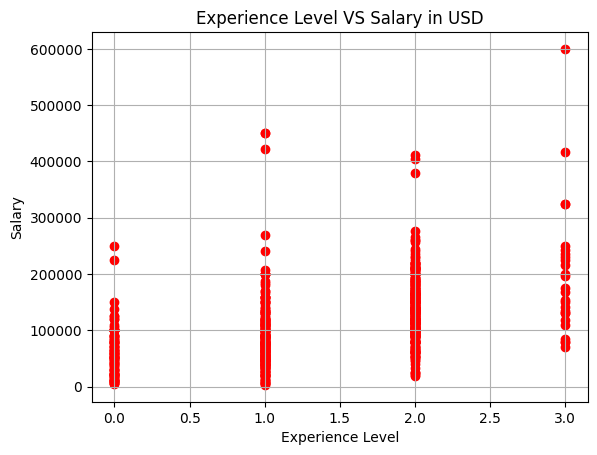

In [268]:
# Check if linear relationship exist
plt.scatter(df['experience_level'], df['salary_in_usd'], color = 'red')
plt.title('Experience Level VS Salary in USD')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

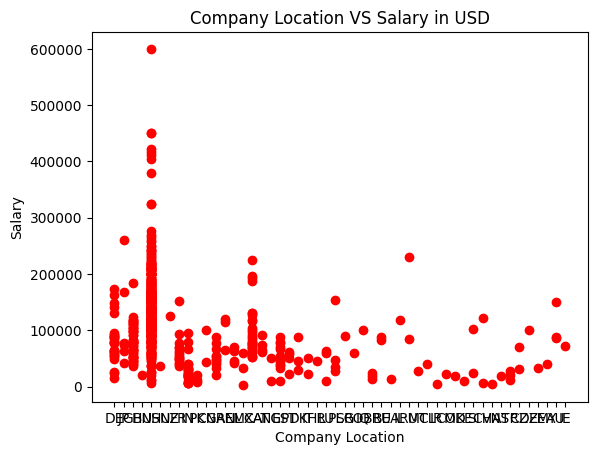

In [269]:
plt.scatter(df['company_location'], df['salary_in_usd'], color = 'red')
plt.title('Company Location VS Salary in USD')
plt.xlabel('Company Location')
plt.ylabel('Salary')
plt.show()

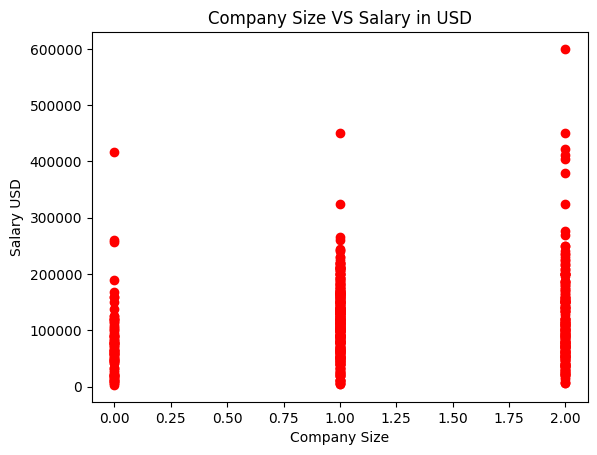

In [270]:
plt.scatter(df['company_size'], df['salary_in_usd'], color = 'red')
plt.title('Company Size VS Salary in USD')
plt.xlabel('Company Size')
plt.ylabel('Salary USD')
plt.show()

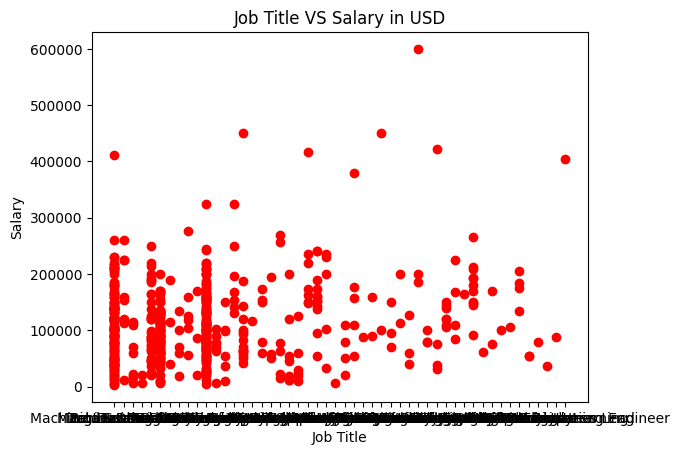

In [271]:
plt.scatter(df['job_title'], df['salary_in_usd'], color = 'red')
plt.title('Job Title VS Salary in USD')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

In [273]:
def df_categ_var(df):
    not_numeric = []
    for column in df.columns:
        if not is_numeric_dtype(df[column]):
            not_numeric.append(column)
            
    for count, column in enumerate(not_numeric):
        for idx, cat in enumerate(df.groupby(column).groups.keys()):
            new_column = cat
            df[new_column] = np.where((df[column] != cat),0,1)
        df = df.drop([column], axis=1)
    return df

In [278]:
df = df_categ_var(df)
df.head()

C:\Users\sian-\AppData\Local\Temp\ipykernel_10716\3615373971.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_column] = np.where((df[column] != cat),0,1)
C:\Users\sian-\AppData\Local\Temp\ipykernel_10716\3615373971.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_column] = np.where((df[column] != cat),0,1)
C:\Users\sian-\AppData\Local\Temp\ipykernel_10716\3615373971.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

,experience_level,salary_in_usd,company_size,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,BI Data Analyst,Big Data Architect,...,PL,PT,RO,RU,SG,SI,TR,UA,US,VN
0,1,79833,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,109024,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,20000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,150000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [279]:
X = df[df.drop(['salary_in_usd'], axis=1).columns]
Y = df['salary_in_usd']

In [296]:
#sklearn
regr = linear_model.LinearRegression()
regr.fit(X.values,Y)

print('Intercept: \n', regr.intercept_) # does not make any sense -> information can be disregarded
print('Coefficients: \n', regr.coef_)
X.columns

Intercept: 
 -2745704239468566.0
Coefficients: 
 [ 2.67117274e+04  9.94769374e+03 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092906e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14 -9.88092907e+14
  3.73379715e+15  3.73379715e+15  3.73379715e+15  3.73379715e+15
  3.73379715e+15  3.73379715e+15  3.73379

Index(['experience_level', 'company_size', '3D Computer Vision Researcher',
       'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist',
       'Applied Machine Learning Scientist', 'BI Data Analyst',
       'Big Data Architect', 'Big Data Engineer',
       ...
       'PL', 'PT', 'RO', 'RU', 'SG', 'SI', 'TR', 'UA', 'US', 'VN'],
      dtype='object', length=102)

In [287]:
def regr_prediction(regr, X, experience_level, company_size, job_title, company_location):
    result_list = [experience_level, company_size]
    for i, column in enumerate(X.columns):
        if column == job_title or column == company_location:
            result_list.append(1)
        elif column == 'experience_level' or column == 'company_size':
            ;
        else:
            result_list.append(0)
    
    #print(result_list)
    return regr.predict([result_list])
    

In [293]:
print(experience_levels)
print(sizes)
print(job_titles)
print(locations)

[0, 1, 2, 3]
[0, 1, 2]
['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist', 'Applied Machine Learning Scientist', 'BI Data Analyst', 'Big Data Architect', 'Big Data Engineer', 'Business Data Analyst', 'Cloud Data Engineer', 'Computer Vision Engineer', 'Computer Vision Software Engineer', 'Data Analyst', 'Data Analytics Engineer', 'Data Analytics Lead', 'Data Analytics Manager', 'Data Architect', 'Data Engineer', 'Data Engineering Manager', 'Data Science Consultant', 'Data Science Engineer', 'Data Science Manager', 'Data Scientist', 'Data Specialist', 'Director of Data Engineering', 'Director of Data Science', 'ETL Developer', 'Finance Data Analyst', 'Financial Data Analyst', 'Head of Data', 'Head of Data Science', 'Head of Machine Learning', 'Lead Data Analyst', 'Lead Data Engineer', 'Lead Data Scientist', 'Lead Machine Learning Engineer', 'ML Engineer', 'Machine Learning Developer', 'Machine Learning Engineer', 'Machine Learning Infrastruct

In [298]:
regr_prediction(regr, X, 2,2, "AI Scientist", "US")

[2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


array([135395.5])